In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn import datasets
import scipy.optimize as opt
from math import sqrt


%matplotlib inline

 By doing this, we will be able to study the effect of each feature on the dependent variable 

In [2]:
data_x = pd.read_csv('demo_caries_x.csv', index_col=False)
data_y = pd.read_csv('demo_caries_y.csv', index_col=False)
data = pd.concat([data_x, data_y], axis = 1)
data = data.drop(columns="ID")
data.head()

,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,DMDBORN4,DMDCITZN,DMDEDUC3,DMDEDUC2,...,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR,OUTPUT
0,1.103065,-0.117923,-0.224917,-1.022062,1.255341,0.370975,-0.455735,-0.258301,0.733099,-0.370353,...,-0.270316,-2.660909,-0.095293,-0.101203,-0.962825,-0.703204,-0.272598,-0.252338,-0.258429,1
1,1.817111,-0.117923,-0.224917,0.978139,1.301970,-4.635980,-0.455735,-0.258301,0.710193,0.854105,...,-0.270316,-0.661851,1.368985,1.286272,-0.962825,-0.464729,-0.056912,-0.029714,1.506775,1
2,1.539426,-0.117923,-0.224917,0.978139,-0.275011,0.370975,-0.455735,-0.258301,-0.093382,-1.594812,...,-0.123348,-0.001640,0.355376,0.336546,1.038318,0.250693,-0.560180,-0.549171,-0.633454,0
3,-0.007673,-0.117923,-0.224917,0.978139,-0.220630,0.370975,-0.455735,-0.258301,-0.051323,2.078564,...,0.317557,0.097166,2.779416,2.741962,1.038318,0.489168,0.302565,0.341327,1.823606,0
4,1.975787,-0.117923,-0.224917,-1.022062,1.568519,0.370975,-0.455735,-0.258301,1.055281,2.078564,...,-0.270316,1.337206,0.922431,0.819710,-0.962825,1.204591,0.230670,0.267119,1.823606,1


In [3]:
data.tail()

,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,DMDBORN4,DMDCITZN,DMDEDUC3,DMDEDUC2,...,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR,OUTPUT
3547,-0.920064,-1.669271,-1.428991,-1.022062,-1.131274,0.096357,-0.455735,-0.258301,-0.128883,0.028664,...,0.464526,0.104000,-0.124253,-0.115462,-0.962825,-1.180152,-0.200703,-0.178130,0.090732,0
3548,0.389019,0.657751,0.377121,-1.022062,-0.274666,0.370975,-0.455735,-0.258301,-0.134488,0.854105,...,0.317557,0.116472,-0.216017,-0.175408,-0.962825,0.250693,-0.200703,-0.178130,0.465757,0
3549,1.380749,-1.669271,-1.428991,0.978139,1.273062,0.370975,-0.455735,-0.258301,0.779782,-1.594812,...,-0.270316,-0.661851,-0.642938,-0.664809,-0.962825,-0.464729,-0.056912,-0.029714,0.873112,1
3550,0.547696,-1.669271,-1.428991,-1.022062,-0.413676,0.370975,2.193642,2.488659,-0.299916,-2.819271,...,0.023621,0.087866,0.847328,0.946374,1.038318,0.966116,-0.128807,-0.103922,1.054158,0
3551,-0.959733,-1.669271,-1.428991,0.978139,-1.451112,0.127016,-0.455735,-0.258301,-0.149123,0.061554,...,-0.270316,-0.661851,-0.462428,-0.438712,-0.962825,-0.941678,-0.200703,-0.178130,-0.148508,0


In [4]:
normalize = lambda x: (x-x.mean())/x.std()

In [5]:
train, test = train_test_split(data, test_size=0.3)

nx_train = train.iloc[:,0:-1].values
ny_train = train.iloc[:,-1].values
# ---- 
nx_test = test.iloc[:,:-1].values
ny_test = test.iloc[:,-1].values

ny_train = ny_train.reshape(-1,1)
ny_test = ny_test.reshape(-1,1)

nx_train = np.append(np.ones(shape=(nx_train.shape[0],1)),nx_train,axis = 1)
nx_test = np.append(np.ones(shape=(nx_test.shape[0],1)),nx_test,axis = 1)

m_train, n_train = nx_train.shape
m_test, n_test = nx_test.shape

## Data Visualization

In [6]:
#infected = data.iloc[ny_train == 1]
#not_infected = data.iloc[ny_train == 0]

# plots
#plt.scatter(infected.iloc[:, 0], infected.iloc[:, 1], s=10, label='Infected')
#plt.scatter(not_infected.iloc[:, 0], not_infected.iloc[:, 1], s=10, label='Not infected')
#plt.legend()
#plt.show()

## Sigmoid

In [7]:
sigmoid = lambda z: 1 / (1 + np.exp(-z))

## Hyphotesis

In [8]:
def calculate_hyphotesis(x, theta):
    return sigmoid(np.dot(x, theta))

## Cost Function

In [9]:
def cost_function(theta, x, y):
    m, n = x.shape
    theta = theta.reshape(n,1)
    infunc = -y*(np.log(calculate_hyphotesis(x,theta))) - (1-y)*(np.log(1 - calculate_hyphotesis(x,theta)))
    return np.sum(infunc)/m

In [10]:
def cost_function2(hyp, x, y):
    infunc = -y*(np.log(hyp)) - (1-y)*(np.log(1 - hyp))
    return np.sum(infunc)/x.shape[0]

## Gradient Descent

In [11]:
def compute_gradient(theta,x,y):
    m, n = x.shape
    theta = theta.reshape(n,1)
    gradient =  np.dot(x.transpose(), calculate_hyphotesis(x,theta)-y)/m
    return gradient.flatten()

In [12]:
def calculate_theta(x, y, theta_):
    theta = opt.minimize(fun=cost_function, x0=theta_, args=(x, y), method='TNC', jac=compute_gradient)
    theta = theta.x
    return theta

## Predictions on Probabilities

In [13]:
def predict_probs(x, theta):
    return calculate_hyphotesis(x, theta)

def predict(x, theta, threshold=0.5):
    return 1*(predict_probs(x, theta) >= threshold)

In [14]:
theta = calculate_theta(nx_train, ny_train, np.zeros(n_test))
y_hat = predict(nx_train, theta)

## Curva 01: Bias & Variance

In [23]:
train_error = np.zeros(n_test)
test_error = np.zeros(n_test)

_theta = np.zeros(n_test)

for i in range(0, n_test):
    train_ = nx_train[:,0:i]
    test_ = nx_test[:,0:i]
    theta_ = _theta[0:i]
    
    theta = calculate_theta(x=train_, y=ny_train, theta_=theta_)
    
    hyph_train = predict(train_, theta)
    hyph_test = predict(test_, theta)
    
    train_error[i] = cost_function(theta, train_, ny_train)
    test_error[i]  = cost_function(theta, test_, ny_test)

/home/ospcx/anaconda3/envs/pyml/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log
/home/ospcx/anaconda3/envs/pyml/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in multiply


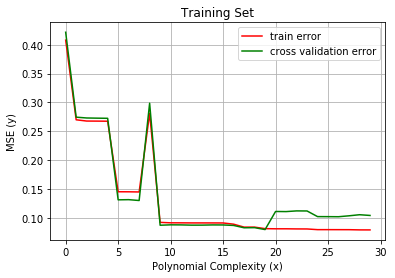

In [25]:
plt.plot(np.arange(n_test-1),train_error[1:], label = 'train error', color='red')
plt.plot(np.arange(n_test-1),test_error[1:], label = 'cross validation error', color= 'green')
plt.title('Training Set')
plt.xlabel('Polynomial Complexity (x)')
plt.ylabel('MSE (y)')
plt.grid()
plt.legend()
plt.show()

In [28]:
# Curva 02
train_error = np.zeros(m_test)
test_error = np.zeros(m_test)

theta = calculate_theta(x=nx_train, y=ny_train, theta_=np.zeros(n_test))

for i in range(1, m_test):
    hyph_train = predict(nx_train[0:i,:], theta)
    hyph_test = predict(nx_test[0:i,:], theta)
    
    train_error[i] = cost_function(theta, nx_train[0:i,:], ny_train[0:i,]) # mean_squared_error(hyph_train, ny_train[0:i,])
    test_error[i] =  cost_function(theta, nx_test[0:i,:], ny_test[0:i,]) # mean_squared_error(hyph_test, ny_test[0:i,])

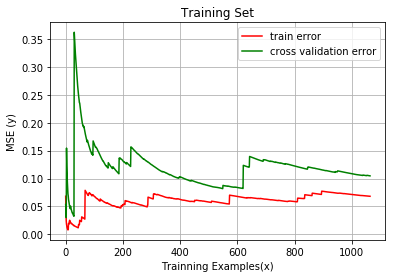

In [29]:
plt.plot(np.arange(m_test-1),train_error[1:], label = 'train error', color='red')
plt.plot(np.arange(m_test-1),test_error[1:], label = 'cross validation error', color='green')
plt.title('Training Set')
plt.xlabel('Trainning Examples(x)')
plt.ylabel('MSE (y)')
plt.grid()
plt.legend()
plt.show()

## Curva 03: Specificity & Sensitivity(Polinomial Complexity)

In [31]:
# calculate vals
def calculate_vals(y_hat, y):
    # True Positive (TP)
    TP = np.sum(np.logical_and(y_hat == 1, y == 1))

    # True Negative (TN)
    TN = np.sum(np.logical_and(y_hat == 0, y == 0))

    # False Positive (FP)
    FP = np.sum(np.logical_and(y_hat == 1, y == 0))

    # False Negative (FN)
    FN = np.sum(np.logical_and(y_hat == 0, y == 1))

    return [TP, TN, FP, FN]

# calculate_TPR
def calculate_TPR(values):
    return values[0]/(values[0] + values[3])


# calculate_TNR
def calculate_TNR(values):
    return values[1]/(values[2] + values[1])


# calculate_FPR
def calculate_FPR(values):
    return values[2]/(values[2] + values[3])

In [34]:
# ----- SENSITIVITY ----- 
TPR_train = np.zeros(n_test)
TPR_test = np.zeros(n_test)
# ----- SPECIFICITY -----
TNR_train = np.zeros(n_test)
TNR_test = np.zeros(n_test)

_theta = np.zeros(n_test)


for i in range(1, n_test):
    train_ = nx_train[:,0:i]
    test_ = nx_test[:,0:i]
    theta_ = _theta[0:i]
    
    theta = calculate_theta(x=train_, y=ny_train, theta_=theta_)
    
    hyph_train = predict(train_, theta)
    hyph_test = predict(test_, theta)
    
    hyph_train_vals = calculate_vals(hyph_train, ny_train)
    hyph_test_vals = calculate_vals(hyph_test, ny_train)
    
    TPR_train[i] = calculate_TPR(hyph_train_vals)
    TNR_train[i] = calculate_TNR(hyph_train_vals)
    
    TPR_test[i] = calculate_TPR(hyph_test_vals)
    TNR_test[i] = calculate_TNR(hyph_test_vals)
    


/home/ospcx/anaconda3/envs/pyml/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log
/home/ospcx/anaconda3/envs/pyml/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in multiply


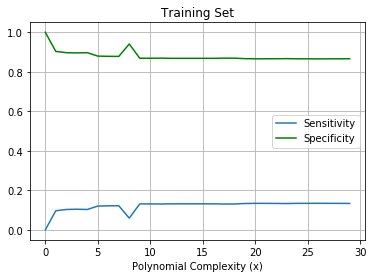

In [35]:
plt.plot(np.arange(n_test-1),TPR_train[1:], label = 'Sensitivity')
plt.plot(np.arange(n_test-1),TNR_train[1:], label = 'Specificity', color= 'green')
plt.title('Training Set')
plt.xlabel('Polynomial Complexity (x)')
# plt.ylabel('MSE (y)')
plt.grid()
plt.legend()
plt.show()


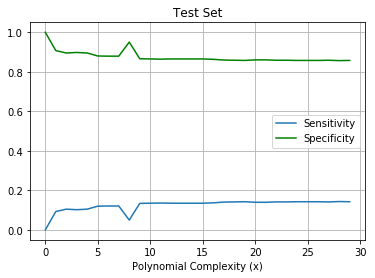

In [36]:
plt.plot(np.arange(n_test-1),TPR_test[1:], label = 'Sensitivity')
plt.plot(np.arange(n_test-1),TNR_test[1:], label = 'Specificity', color= 'green')
plt.title('Test Set')
plt.xlabel('Polynomial Complexity (x)')
# plt.ylabel('MSE (y)')
plt.grid()
plt.legend()
plt.show()

## Confussion Matrix